<a href="https://colab.research.google.com/github/Pratt33/ML_Algorithms_From_Scratch/blob/main/Linear_Regression_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

Aim to build a simple linear regression model from scratch to predict the package (in LPA) offered to students based on their CGPA.

#Objective

1. Develop a linear regression model without using external libraries like scikit-learn for training.

2. Train the model on a dataset of CGPA and corresponding packages.

3. Evaluate the model's performance and visualize the regression line.

#Approach

1. Implement a custom linear regression class (MyLR).

2. Use the least squares method to compute the slope (m) and intercept (b) of the regression line.

3. Split the dataset into training and testing sets.

4. Train the model on the training data and use it to predict packages for the testing data.

5. Visualize the training data and the regression line.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Define the MyLR class for linear regression
class MyLR:
    def __init__(self):
        # Initialize the slope (m) and intercept (b) as None
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        """
        Train the linear regression model using the least squares method.
        Arguments:
        - X_train: Training input features (independent variable).
        - y_train: Training target values (dependent variable).
        """
        num = 0  # Numerator for slope calculation
        den = 0  # Denominator for slope calculation

        for i in range(X_train.shape[0]):
            # Calculate the deviation of X and y from their means
            A = X_train[i] - X_train.mean()
            B = y_train[i] - y_train.mean()

            # Update numerator and denominator
            num += (A * B)
            den += (A ** 2)

        # Compute slope (m) and intercept (b)
        self.m = num / den
        self.b = y_train.mean() - (self.m * X_train.mean())

        # Print the computed slope and intercept
        print("Slope (m):", self.m)
        print("Intercept (b):", self.b)

    def predict(self, X_test):
        """
        Predict the target values for the given test data.
        Arguments:
        - X_test: Test input features (independent variable).
        Returns:
        - Predicted target values.
        """
        return self.m * X_test + self.b

In [3]:
# Creating the dataset
data = {
    "CGPA": [8.5, 9.0, 7.8, 8.2, 9.3, 8.7, 8.2, 7.5, 9.5, 8.8, 7.9, 8.1, 8.4, 9.1, 9.0],
    "Package (LPA)": [6, 8, 5, 7, 10, 8.7, 8, 5.5, 11, 9, 6, 7.2, 7.5, 10.5, 8.5]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

In [4]:
# Display the first few rows of the dataset
print("Dataset:")
df.head()

Dataset:


,CGPA,Package (LPA)
0,8.5,6.0
1,9.0,8.0
2,7.8,5.0
3,8.2,7.0
4,9.3,10.0


In [5]:
# Extract features (CGPA) and target values (Package)
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [7]:
# Display the number of training samples
print("\nNumber of training samples:", X_train.shape[0])


Number of training samples: 12


In [8]:
# Initialize the linear regression model
lr = MyLR()

In [9]:
# Train the model
lr.fit(X_train, y_train)

Slope (m): 2.799247963233757
Intercept (b): -16.10361395445998


In [10]:
# Test prediction for the first value in the test set
predicted_value = lr.predict(X_test[0])
print("\nPrediction for the first test input:", predicted_value)


Prediction for the first test input: 6.57029454773345


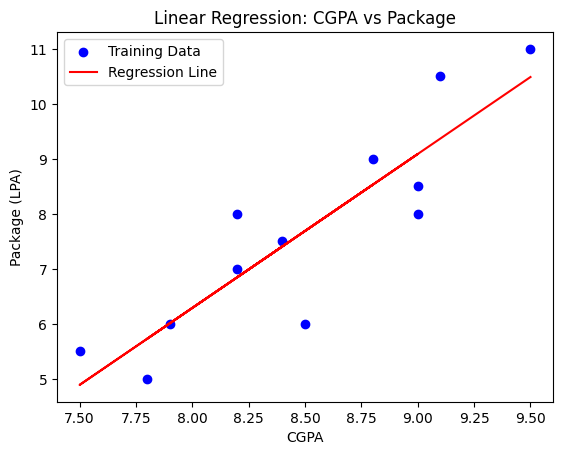

In [11]:
# Plotting the training data and the regression line
plt.scatter(X_train, y_train, label="Training Data", color="blue")
plt.plot(X_train, lr.predict(X_train), color="red", label="Regression Line")
plt.xlabel("CGPA")
plt.ylabel("Package (LPA)")
plt.title("Linear Regression: CGPA vs Package")
plt.legend()
plt.show()